In [1]:
import numpy as np
from cmath import nan
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('data.csv')
us=pd.read_csv('uszips.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96753 non-null  int64  
 1   Cardnum            96753 non-null  int64  
 2   Date               96753 non-null  object 
 3   Merchnum           93374 non-null  object 
 4   Merch description  96753 non-null  object 
 5   Merch state        95551 non-null  object 
 6   Merch zip          92094 non-null  float64
 7   Transtype          96753 non-null  object 
 8   Amount             96753 non-null  float64
 9   Fraud              96753 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.4+ MB
None


In [2]:
# Data exploration
data['Fraud'].value_counts()
fraud_count=len(data[data['Fraud']==0])
nonfraud_count=len(data[data['Fraud']==1])
print("Percentage of frauds=",fraud_count/(fraud_count+nonfraud_count))
print("Percentage of non frauds=",nonfraud_count/(fraud_count+nonfraud_count))

Percentage of frauds= 0.9890546029580478
Percentage of non frauds= 0.010945397041952187


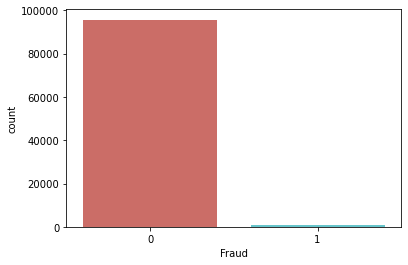

<Figure size 432x288 with 0 Axes>

In [3]:
sns.countplot(x="Fraud",data=data,palette='hls')
plt.show()
plt.savefig('Fraud_count_plot')

In [4]:
print(len(data.Cardnum.unique()))

1645


In [5]:
#Missing Data fill
'''FILL MERCH STATE'''
print(np.count_nonzero(data['Merch state'].isnull().values))
zip_dict = pd.Series(us.state_id.values,index=us.zip.values).to_dict()
data.loc[data['Merch state'].isnull(),'Merch state'] = data['Merch zip'].map(zip_dict)
print(np.count_nonzero(data['Merch state'].isnull().values))

1202
1149


In [6]:
'''FILL MERCH ZIP'''
print(np.count_nonzero(data['Merch zip'].isnull().values))
state_dict = pd.Series(us.zip.values,index=us.state_id.values).to_dict()
data.loc[data['Merch zip'].isnull(),'Merch zip'] = data['Merch state'].map(state_dict)
print(np.count_nonzero(data['Merch zip'].isnull().values))

4659
1481


In [7]:
'''FILL MERCH NUM'''
print(np.count_nonzero(data['Merchnum'].isnull().values))
desc_dict = pd.Series(data.Merchnum.values,index=data['Merch description'].values).to_dict()
data.loc[data['Merchnum'].isnull(),'Merchnum'] = data['Merch description'].map(desc_dict)
print(np.count_nonzero(data['Merchnum'].isnull().values))

3379
3001


In [8]:
'''FILL MERCH NUM
print(np.count_nonzero(data['Merchnum'].isnull().values))
zip1_dict = pd.Series(data.Merchnum.values,index=data['Merch zip'].values).to_dict()
data.loc[data['Merchnum'].isnull(),'Merchnum'] = data['Merch zip'].map(zip1_dict)
print(np.count_nonzero(data['Merchnum'].isnull().values))
'''

"FILL MERCH NUM\nprint(np.count_nonzero(data['Merchnum'].isnull().values))\nzip1_dict = pd.Series(data.Merchnum.values,index=data['Merch zip'].values).to_dict()\ndata.loc[data['Merchnum'].isnull(),'Merchnum'] = data['Merch zip'].map(zip1_dict)\nprint(np.count_nonzero(data['Merchnum'].isnull().values))\n"

In [9]:
'''REMOVE NULL AND DUPLICATE'''
data['Merch zip'].replace('', np.nan, inplace=True)
data.dropna(subset=['Merch zip'], inplace=True)

data['Merch state'].replace('', np.nan, inplace=True)
data.dropna(subset=['Merch state'], inplace=True)

data['Merchnum'].replace('', np.nan, inplace=True)
data.dropna(subset=['Merchnum'], inplace=True)

print(np.count_nonzero(data.isnull().values))
print(len(data))

data.drop_duplicates(subset=['Cardnum', 'Merchnum','Merch description','Amount','Date','Merch state'],keep='first',inplace=True)
print(len(data))

0
93458
87014


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87014 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             87014 non-null  int64  
 1   Cardnum            87014 non-null  int64  
 2   Date               87014 non-null  object 
 3   Merchnum           87014 non-null  object 
 4   Merch description  87014 non-null  object 
 5   Merch state        87014 non-null  object 
 6   Merch zip          87014 non-null  float64
 7   Transtype          87014 non-null  object 
 8   Amount             87014 non-null  float64
 9   Fraud              87014 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.3+ MB
None


In [11]:

# Convert categorical data into numerical data

encoder=preprocessing.LabelEncoder()
data['Merch description']=encoder.fit_transform(data['Merch description'])
print(data['Merch description'])


data['Recnum']=encoder.fit_transform(data['Recnum'])
print(data['Recnum'])


data['Cardnum']=encoder.fit_transform(data['Cardnum'])
print(data['Cardnum'])

data['Merchnum']=encoder.fit_transform(data['Merchnum'])
print(data['Merchnum'])

data['Date']=encoder.fit_transform(data['Date'])
print(data['Date'])

data['Merch state']=encoder.fit_transform(data['Merch state'])
print(data['Merch state'])

data['Merch zip']=encoder.fit_transform(data['Merch zip'])
print(data['Merch zip'])


data['Transtype']=encoder.fit_transform(data['Transtype'])
print(data['Transtype'])


data['Amount']=encoder.fit_transform(data['Amount'])
print(data['Amount'])


data['Fraud']=encoder.fit_transform(data['Fraud'])
print(data['Fraud'])

print(data.info())
#data.to_csv('new.csv')



0         4382
2         8014
5         4380
6         4386
7         7146
         ...  
96748     1461
96749     6872
96750    10718
96751     2008
96752    10394
Name: Merch description, Length: 87014, dtype: int32
0            0
2            1
5            2
6            3
7            4
         ...  
96748    87009
96749    87010
96750    87011
96751    87012
96752    87013
Name: Recnum, Length: 87014, dtype: int64
0         657
2         177
5         318
6         645
7         662
         ... 
96748    1333
96749     946
96750     951
96751    1096
96752    1083
Name: Cardnum, Length: 87014, dtype: int64
0        2530
2        1846
5        2530
6        2530
7        3171
         ... 
96748    1365
96749    4846
96750    1844
96751    5062
96752    5677
Name: Merchnum, Length: 87014, dtype: int32
0          0
2          0
5          0
6          0
7          0
        ... 
96748    364
96749    364
96750    364
96751    364
96752    364
Name: Date, Length: 87014, dtype: int

In [12]:
# Splitting data

'''
non_fraud= data[data.Fraud == 0]
fraud= data[data.Fraud == 1]

print(non_fraud.shape)
print(fraud.shape)

non_fraud_sample=non_fraud.sample(n=1059)

new_dataset=pd.concat([non_fraud_sample,fraud],axis=0)
print(new_dataset.head())

print(new_dataset['Fraud'].value_counts())

x= new_dataset.drop(columns='Fraud',axis=1)
y=new_dataset['Fraud']'''

"\nnon_fraud= data[data.Fraud == 0]\nfraud= data[data.Fraud == 1]\n\nprint(non_fraud.shape)\nprint(fraud.shape)\n\nnon_fraud_sample=non_fraud.sample(n=1059)\n\nnew_dataset=pd.concat([non_fraud_sample,fraud],axis=0)\nprint(new_dataset.head())\n\nprint(new_dataset['Fraud'].value_counts())\n\nx= new_dataset.drop(columns='Fraud',axis=1)\ny=new_dataset['Fraud']"

In [13]:
# Splitting data

x= data.iloc[:,:8].values
y= data.iloc[:,9].values

print(len(x))
print(len(y))
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[:10],'\n\n')
y_train=y_train.T
y_test=y_test.T
'''
x_train_norm=X_train.T
x_test_norm=X_test.T
y_train=y_train.astype('int').T
y_test=y_test.astype('int').T'''
'''
#for sklearn
y_train=y_train.astype('int')
y_test=y_test.astype('int')
'''

87014
87014
(69611, 8)
(17403, 8)
(69611,)
(17403,)
[0 0 0 0 0 0 0 0 0 0] 




"\n#for sklearn\ny_train=y_train.astype('int')\ny_test=y_test.astype('int')\n"

In [14]:

#DATA NORMALIZATION

#X_TRAIN
standard = StandardScaler()
x_train = standard.fit_transform(X_train)
x_train_norm=pd.DataFrame(x_train).T
print(x_train_norm[:10],'\n\n')

#X_TEST
x_test = standard.fit_transform(X_test)
x_test_norm=pd.DataFrame(x_test).T
print(x_test_norm[:10],'\n\n')

      0         1         2         3         4         5         6      \
0  0.170128 -1.018861  1.021087  0.724148  0.105370 -0.754540 -1.402435   
1 -0.241905 -1.159810 -0.456783  0.900222  1.129115  1.287938  1.383700   
2 -0.198236  0.452124  1.198124  1.714586 -0.657313 -0.341697 -0.819903   
3 -0.887763 -1.426046  0.056518  0.364646  0.749672  0.644812 -0.302158   
4 -0.821157  1.045716 -1.497349 -0.437516  0.208116  1.291092  0.539833   
5  1.148278  1.214853  1.281429  1.148278  1.281429  0.549099 -0.249807   
6  1.091626  1.282636 -0.703538  1.079223 -0.909432  0.041484  0.454099   
7  0.003790  0.003790  0.003790  0.003790  0.003790  0.003790  0.003790   

      7         8         9      ...     69601     69602     69603     69604  \
0  0.211616  0.838548  1.560828  ... -1.524870  0.336636 -0.401634 -0.165117   
1  0.423752 -1.337319  1.322973  ... -0.552544  0.435430  1.383700 -1.299949   
2  0.375611 -0.523416 -0.724262  ...  1.236381  1.705022  0.241713 -0.437339   
3 -0

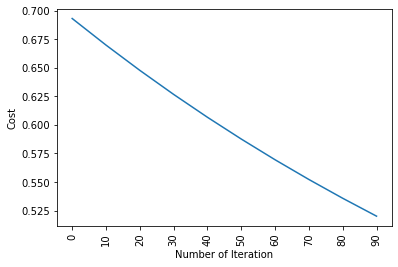

test accuracy: 98.81054990518876 %


In [15]:

#without sklearn
from sklearn.metrics import classification_report
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train_norm,y_head):
    z = np.dot(w.T,x_train_norm) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss)) / x_train_norm.shape[1]
    #backward propogation
    derivative_weight = (np.dot(x_train_norm,((y_head-y_train).T)))/x_train_norm.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train_norm.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train_norm, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train_norm,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            #print ("Cost after iteration %i: %f" %(i, cost))
            parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
            
def predict(w,b,x_test_norm):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test_norm)+b)
    Y_prediction = np.zeros((1,x_test_norm.shape[1]))
    # if z is bigger than 0.5, our prediction is Fraud (y_head=1),
    # if z is smaller than 0.5, our prediction is zero means not Fraud (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train_norm, y_train, x_test_norm, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train_norm.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train_norm, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test_norm)
    

    # Print train/test Errors
    
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
logistic_regression(x_train_norm, y_train, x_test_norm, y_test,learning_rate = 0.01, num_iterations = 100)



In [16]:
#different approach to without sklearn
'''
def sigmoid(input):
    return (1/(1+np.exp(-input)))

def optimize(x_train,y_train,lr,it,para):
    size=x_train.shape[0]
    weight=para['w']
    bias=para['b']
    for i in range(it):
        sigma = sigmoid(np.dot(x_train, weight.T) + bias)
        loss = -1/size * np.sum(y_train * np.log(sigma)) + (1 - y) * np.log(1-sigma)
        dW = 1/size * np.dot(x_train.T, (sigma - y_train))
        db = 1/size * np.sum(sigma - y_train)
        weight -= lr * dW
        bias -= lr* db 
    
    para["weight"] = weight
    para["bias"] = bias
    return para


init_para={}
init_para['w']=np.zeros(x_train.shape[1])
init_para['b']=0

def train(x_train,y_train,x_test_norm,y_test,lr,i):
    para_out=optimize(x_train,y_train,lr,i,init_para)
    y_prediction_test = predict(para_out["w"],para_out["b"],x_test_norm)
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return para_out
    
para_out=train(x_train,y_train,x_test_norm,y_test,lr=0.01,i=500)
print(para_out)'''

'\ndef sigmoid(input):\n    return (1/(1+np.exp(-input)))\n\ndef optimize(x_train,y_train,lr,it,para):\n    size=x_train.shape[0]\n    weight=para[\'w\']\n    bias=para[\'b\']\n    for i in range(it):\n        sigma = sigmoid(np.dot(x_train, weight.T) + bias)\n        loss = -1/size * np.sum(y_train * np.log(sigma)) + (1 - y) * np.log(1-sigma)\n        dW = 1/size * np.dot(x_train.T, (sigma - y_train))\n        db = 1/size * np.sum(sigma - y_train)\n        weight -= lr * dW\n        bias -= lr* db \n    \n    para["weight"] = weight\n    para["bias"] = bias\n    return para\n\n\ninit_para={}\ninit_para[\'w\']=np.zeros(x_train.shape[1])\ninit_para[\'b\']=0\n\ndef train(x_train,y_train,x_test_norm,y_test,lr,i):\n    para_out=optimize(x_train,y_train,lr,i,init_para)\n    y_prediction_test = predict(para_out["w"],para_out["b"],x_test_norm)\n    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))\n    return para_out\n    \npara_out=train(x_train,y_

In [17]:
#using sklearn
'''
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))
from sklearn.linear_model import LogisticRegression
import pickle
model=LogisticRegression(random_state=0,solver='liblinear')
l=model.fit(x_train,y_train)
s=pickle.dumps(model)
s1=pickle.loads(s)
y_pred=s1.predict(x_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred)*100)
#print(classification_report(y_test,y_pred,zero_division=0))
print(confusion_matrix(y_test,y_pred))

'''


"\nfrom sklearn import utils\nprint(utils.multiclass.type_of_target(y_train))\nfrom sklearn.linear_model import LogisticRegression\nimport pickle\nmodel=LogisticRegression(random_state=0,solver='liblinear')\nl=model.fit(x_train,y_train)\ns=pickle.dumps(model)\ns1=pickle.loads(s)\ny_pred=s1.predict(x_test)\n\n\nfrom sklearn.metrics import accuracy_score,confusion_matrix,classification_report\nprint(accuracy_score(y_test,y_pred)*100)\n#print(classification_report(y_test,y_pred,zero_division=0))\nprint(confusion_matrix(y_test,y_pred))\n\n"